In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
features = pd.read_csv('features.csv')
features.loc[:,'contrast_fit']=np.log10(features.contrast/np.median(features.contrast))
features.loc[:,'N50_fit'] = np.log10(1+features['N50'])
features.loc[:,'sum_fit']=np.log10(features['sum']/np.median(features['sum']))

In [4]:
model = IsolationForest()
labels=model.fit_predict(features[['N50_fit','contrast_fit','sum_fit']])
features['poor_quality_flag']=labels

print("Percentage of poor-quality images: {:0.2f}".format(100*np.sum((labels<0))/len(labels)))

Percentage of poor-quality images: 24.31


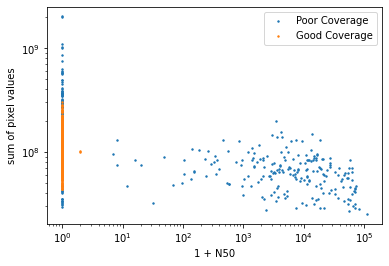

In [5]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Good Coverage')
plt.xlabel("1 + N50")
plt.ylabel("sum of pixel values")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

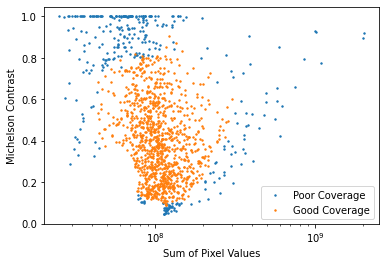

In [6]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==1)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Good Coverage')
plt.xlabel("Sum of Pixel Values")
plt.ylabel("Michelson Contrast")
plt.xscale('log')
plt.legend(loc='best')
plt.show()

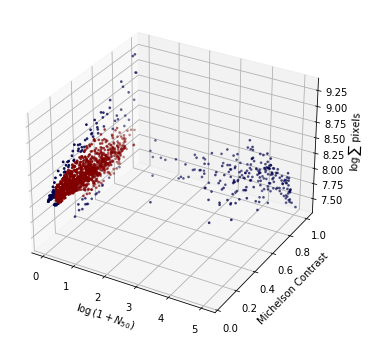

In [7]:
fig = plt.figure(figsize=(7,6))
ax = plt.axes(projection='3d')
sc=ax.scatter3D(np.log10(1+features['N50']), features['contrast'], np.log10(features['sum']), s=3, c=features.poor_quality_flag, cmap='seismic')
ax.set_xlabel(r"$\log\left(1+N_{\rm 50}\right)$")
ax.set_ylabel("Michelson Contrast")
ax.set_zlabel(r"$\log \sum$ pixels")
plt.show()

In [9]:
features.nlargest(10,'sum')

,mean_std_ratio,N50,contrast,sum,lr_sym,ud_sym,entropy,image,contrast_fit,N50_fit,sum_fit,poor_quality_flag
70,1.085112,0,0.920298,2.011554e+09,1.019377e+09,585801600.0,5.287903,rs930522n00,0.337480,0.0,1.301253,-1
69,1.089343,0,0.897996,1.999761e+09,9.754724e+08,499800320.0,5.291625,rs930521n00,0.326826,0.0,1.298699,-1
101,2.215000,0,0.776760,1.081502e+09,2.568296e+08,256718850.0,5.380203,rs930625n00,0.263838,0.0,1.031748,-1
1307,1.076634,0,0.924414,1.014395e+09,4.931715e+08,246834620.0,5.285562,rs932907n00,0.339418,0.0,1.003928,-1
1308,1.031479,0,0.931789,9.906007e+08,5.240364e+08,304548540.0,5.272230,rs932908n00,0.342869,0.0,0.993620,-1
102,2.213786,0,0.793143,8.565212e+08,1.477745e+08,239021000.0,5.379300,rs930626n00,0.272903,0.0,0.930459,-1
43,2.906491,0,0.661781,7.527306e+08,3.675498e+07,166040290.0,5.394449,rs930417n00,0.194266,0.0,0.874361,-1
68,3.453378,0,0.568587,6.223896e+08,1.351177e+08,31302880.0,5.400813,rs930520n00,0.128348,0.0,0.791783,-1
139,5.401167,0,0.424281,6.012015e+08,4.244730e+07,68424540.0,5.411306,rs930730n00,0.001205,0.0,0.776741,-1
1276,2.058454,0,0.850250,5.930737e+08,1.563431e+08,122899330.0,5.370683,rs932809n00,0.303098,0.0,0.770830,-1
